# 1. Importing  Libraries

In [177]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization

import plotly.offline as py
import plotly.graph_objs as go

import keras_tuner as kt

import tensorflow as tf

from IPython.display import SVG
import os

import datetime, time

from tensorflow import keras

import tensorflow as tf

import random

from keras import backend as K
from keras.models import model_from_json
from keras.models import load_model
from keras.regularizers import L1L2
# %maptlotlib inline

## Objective
The aim of this kernal is to train an LSTM model to predict the future price of Commodities like Crude Oil, Gold ,Silver etc.  based on past time series data. This kernal will use LSTM model from the Keras Library


## What is LSTM?¶
LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of processing the entire sequence of data, apart from single data points such as images. This finds application in speech recognition, machine translation, etc. LSTM is a special kind of RNN, which shows outstanding performance on a large variety of problems.

In [117]:
tf.device('/device:GPU:0')


In [37]:
df=pd.read_csv("commodities_12_22.csv")
df.head()

,Date,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
0,2022-06-15,119.11,121.35,7.296,1814.8,21.090,4.1777
1,2022-06-14,118.93,121.17,7.189,1813.5,20.954,4.1565
2,2022-06-13,120.93,122.27,8.609,1831.8,21.255,4.2115
3,2022-06-10,120.67,122.01,8.850,1875.5,21.931,4.2945
4,2022-06-09,121.51,123.07,8.963,1852.8,21.817,4.3810


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3259 non-null   object 
 1   Crude Oil    2734 non-null   float64
 2   Brent Oil    2701 non-null   float64
 3   Natural Gas  2733 non-null   float64
 4   Gold         2742 non-null   float64
 5   Silver       3256 non-null   float64
 6   Copper       2686 non-null   float64
dtypes: float64(6), object(1)
memory usage: 178.4+ KB


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crude Oil,2734.0,65.696774,22.436471,26.210,50.10000,55.280,90.0325,122.1100
Brent Oil,2701.0,73.710655,26.026078,19.330,52.37000,66.550,103.4600,127.9800
Natural Gas,2733.0,3.174109,1.058706,1.482,2.58200,2.912,3.6490,9.3220
Gold,2742.0,1452.908888,252.226159,1049.700,1256.15000,1337.250,1684.7500,2054.6000
Silver,3256.0,20.324379,5.321043,11.772,16.31975,18.071,23.8970,37.1400
Copper,2686.0,3.126402,0.639881,1.994,2.68800,3.050,3.4350,4.9125


In [40]:
df.shape

(3259, 7)

In [41]:
df.dtypes

Date            object
Crude Oil      float64
Brent Oil      float64
Natural Gas    float64
Gold           float64
Silver         float64
Copper         float64
dtype: object

In [42]:
df=df.iloc[::-1]

df.head()

,Date,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
3258,2012-01-02,NaN,NaN,NaN,NaN,28.160,NaN
3257,2012-01-08,NaN,NaN,NaN,NaN,28.848,NaN
3256,2012-01-15,NaN,NaN,NaN,NaN,29.785,NaN
3255,2012-01-22,NaN,NaN,NaN,NaN,31.793,NaN
3254,2012-01-29,NaN,NaN,NaN,NaN,33.908,NaN


In [67]:
df[["Year", "Month", "Day"]] = df["Date"].str.split("-", expand = True)
df.head()

,Date,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper,Year,Month,Day
3258,2012-01-02,NaN,NaN,NaN,NaN,28.160,NaN,2012,01,02
3257,2012-01-08,NaN,NaN,NaN,NaN,28.848,NaN,2012,01,08
3256,2012-01-15,NaN,NaN,NaN,NaN,29.785,NaN,2012,01,15
3255,2012-01-22,NaN,NaN,NaN,NaN,31.793,NaN,2012,01,22
3254,2012-01-29,NaN,NaN,NaN,NaN,33.908,NaN,2012,01,29


In [85]:
df_copy=df.copy()

In [84]:
da=["Month", "Day"]
for j,i in enumerate(da):
    col_date=df.pop(i)
    df.insert(j+2,i,col_date)
df.head()

,Date,Year,Month,Day,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
3258,2012-01-02,2012,01,02,NaN,NaN,NaN,NaN,28.160,NaN
3257,2012-01-08,2012,01,08,NaN,NaN,NaN,NaN,28.848,NaN
3256,2012-01-15,2012,01,15,NaN,NaN,NaN,NaN,29.785,NaN
3255,2012-01-22,2012,01,22,NaN,NaN,NaN,NaN,31.793,NaN
3254,2012-01-29,2012,01,29,NaN,NaN,NaN,NaN,33.908,NaN


In [87]:
for i in df:
    if i!="Date":
        df[i]=df[i].astype('float64')
        print(df[i])
    else:
        pass

3258    2012.0
3257    2012.0
3256    2012.0
3255    2012.0
3254    2012.0
         ...  
4       2022.0
3       2022.0
2       2022.0
1       2022.0
0       2022.0
Name: Year, Length: 3259, dtype: float64
3258    1.0
3257    1.0
3256    1.0
3255    1.0
3254    1.0
       ... 
4       6.0
3       6.0
2       6.0
1       6.0
0       6.0
Name: Month, Length: 3259, dtype: float64
3258     2.0
3257     8.0
3256    15.0
3255    22.0
3254    29.0
        ... 
4        9.0
3       10.0
2       13.0
1       14.0
0       15.0
Name: Day, Length: 3259, dtype: float64
3258       NaN
3257       NaN
3256       NaN
3255       NaN
3254       NaN
         ...  
4       121.51
3       120.67
2       120.93
1       118.93
0       119.11
Name: Crude Oil, Length: 3259, dtype: float64
3258       NaN
3257       NaN
3256       NaN
3255       NaN
3254       NaN
         ...  
4       123.07
3       122.01
2       122.27
1       121.17
0       121.35
Name: Brent Oil, Length: 3259, dtype: float64
3258      NaN
3

In [102]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df

,Date,Year,Month,Day,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
3258,2012-01-02,2012.0,1.0,2.0,NaN,NaN,NaN,NaN,28.160,NaN
3257,2012-01-08,2012.0,1.0,8.0,NaN,NaN,NaN,NaN,28.848,NaN
3256,2012-01-15,2012.0,1.0,15.0,NaN,NaN,NaN,NaN,29.785,NaN
3255,2012-01-22,2012.0,1.0,22.0,NaN,NaN,NaN,NaN,31.793,NaN
3254,2012-01-29,2012.0,1.0,29.0,NaN,NaN,NaN,NaN,33.908,NaN
...,...,...,...,...,...,...,...,...,...,...
4,2022-06-09,2022.0,6.0,9.0,121.51,123.07,8.963,1852.8,21.817,4.3810
3,2022-06-10,2022.0,6.0,10.0,120.67,122.01,8.850,1875.5,21.931,4.2945
2,2022-06-13,2022.0,6.0,13.0,120.93,122.27,8.609,1831.8,21.255,4.2115
1,2022-06-14,2022.0,6.0,14.0,118.93,121.17,7.189,1813.5,20.954,4.1565


In [103]:
df.dtypes

Date           datetime64[ns]
Year                  float64
Month                 float64
Day                   float64
Crude Oil             float64
Brent Oil             float64
Natural Gas           float64
Gold                  float64
Silver                float64
Copper                float64
dtype: object

#  2. Exploratory Data Analysis

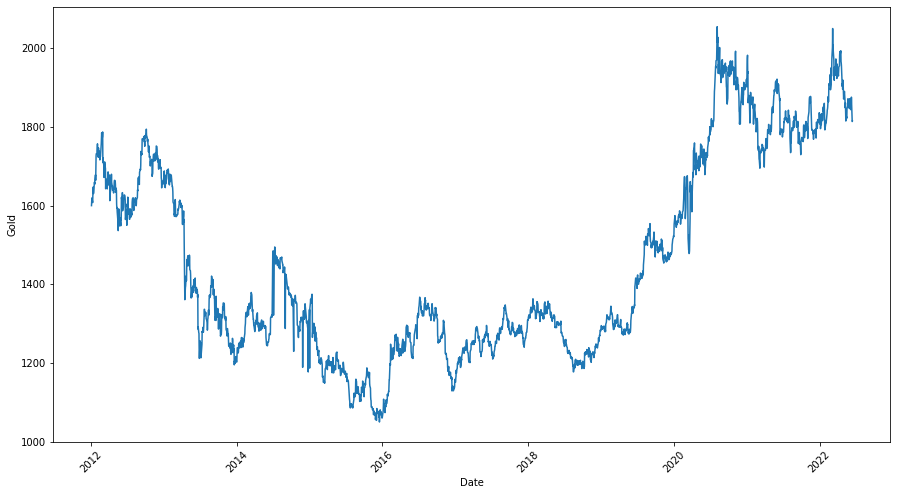

In [104]:
plt.rcParams["figure.figsize"] = (15,8)
sns.lineplot(data=df, x="Date", y="Gold")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
# ax = plt.gca()
plt.show()

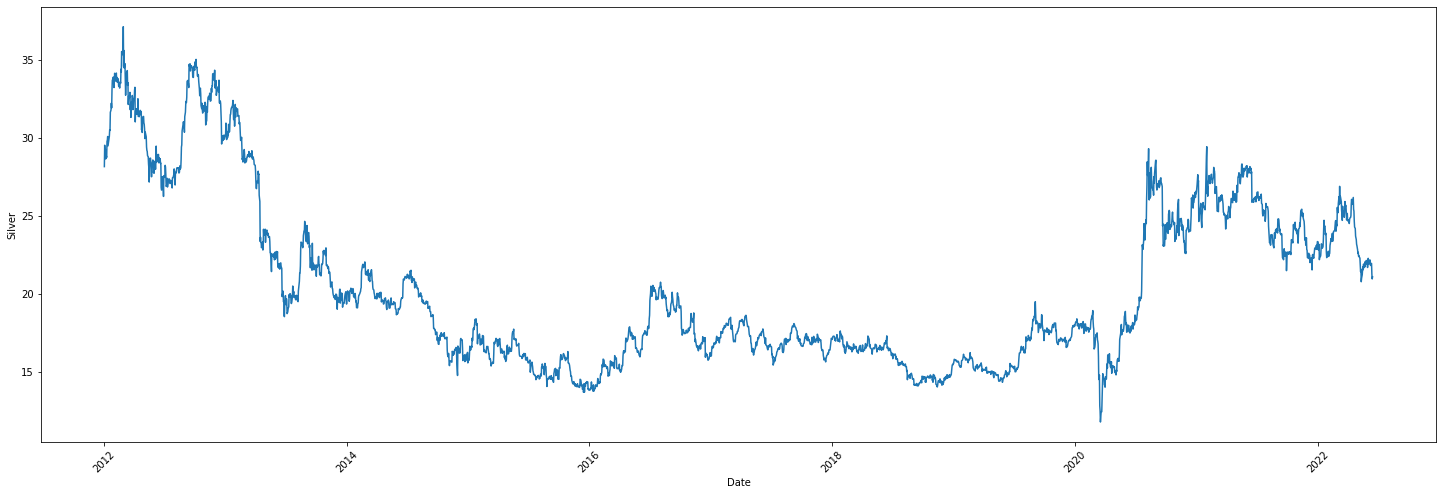

In [105]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Silver")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()

plt.show()

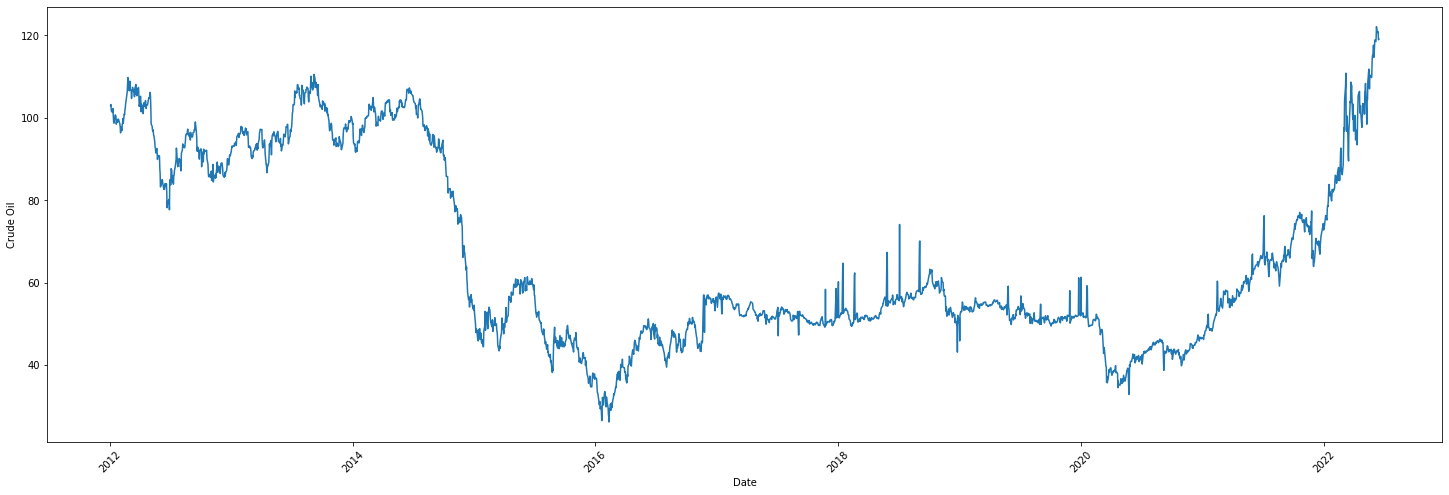

In [106]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Crude Oil")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()

plt.show()

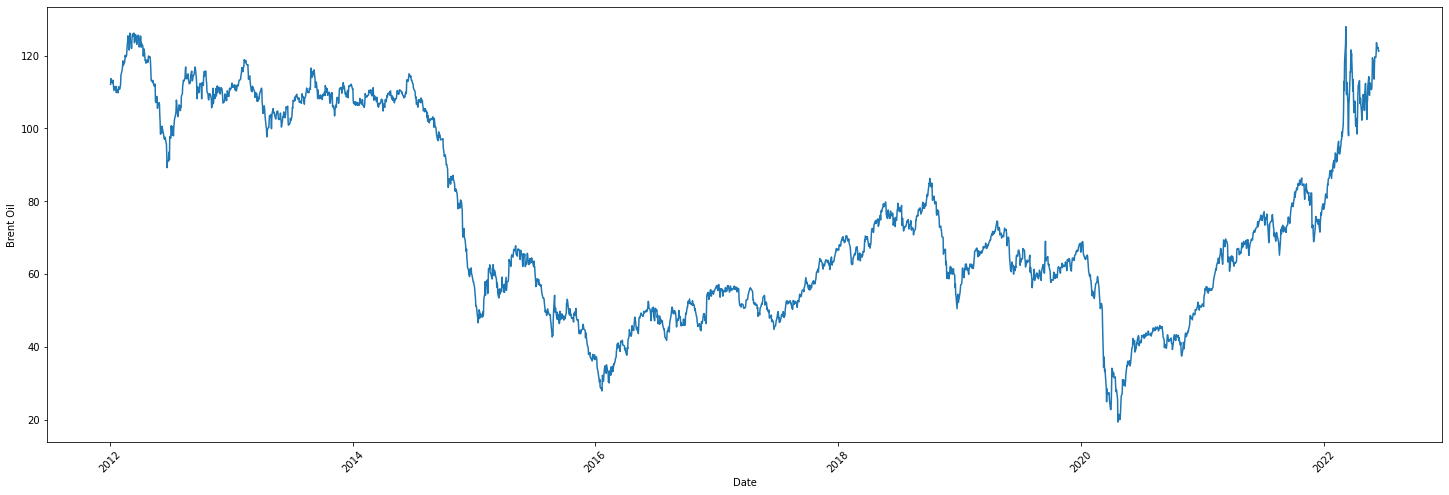

In [107]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Brent Oil")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()

plt.show()

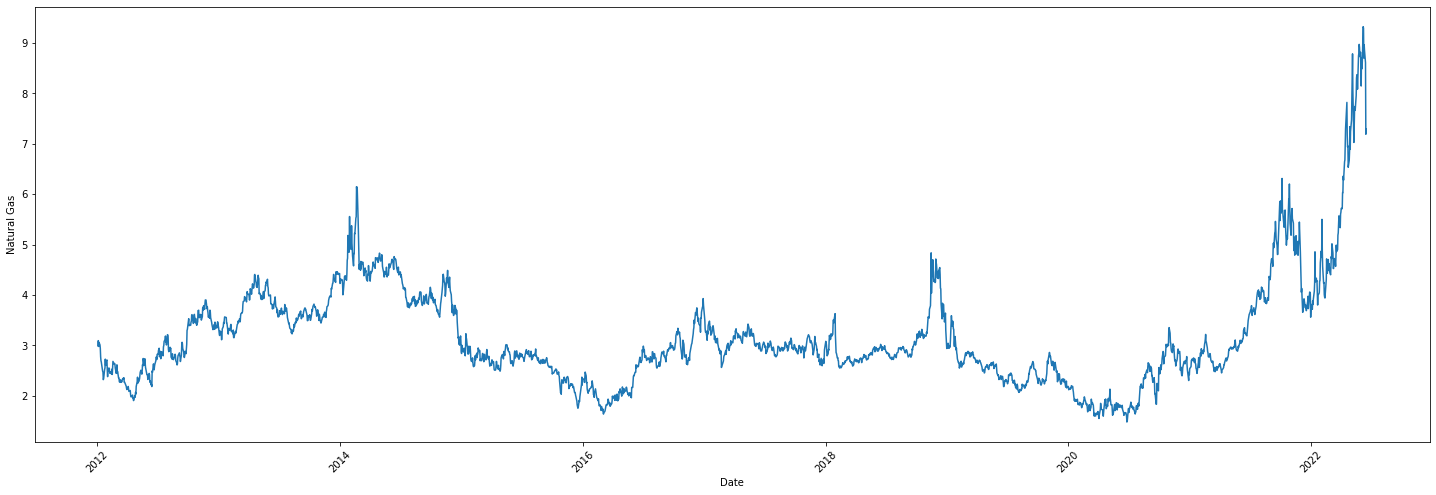

In [108]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Natural Gas")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()
plt.show()

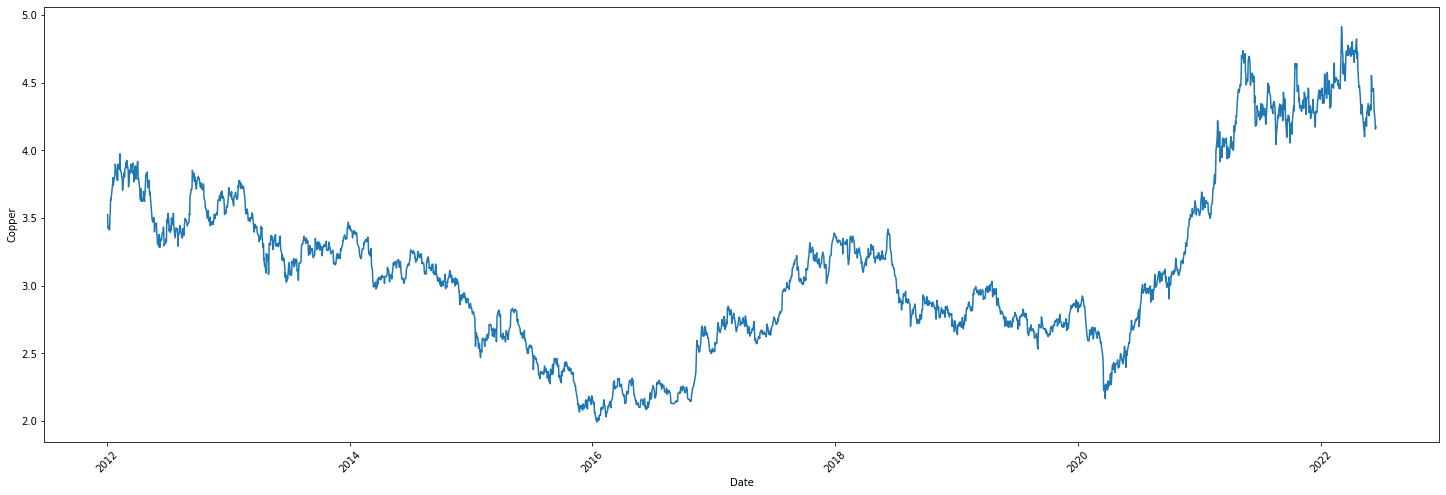

In [109]:
plt.rcParams["figure.figsize"] = (25,8)
sns.lineplot(data=df, x="Date", y="Copper")
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
ax = plt.gca()

plt.show()

In [18]:
plt.plot??

In [43]:
df.corr()

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Crude Oil,1.000000,0.967352,0.629670,0.235434,0.575061,0.576720
Brent Oil,0.967352,1.000000,0.561949,0.218652,0.599688,0.601358
Natural Gas,0.629670,0.561949,1.000000,0.198904,0.198497,0.559681
Gold,0.235434,0.218652,0.198904,1.000000,0.734949,0.713134
Silver,0.575061,0.599688,0.198497,0.734949,1.000000,0.688431
Copper,0.576720,0.601358,0.559681,0.713134,0.688431,1.000000


## Correlation Between the Commodities for the  last 10 Years

<AxesSubplot:>

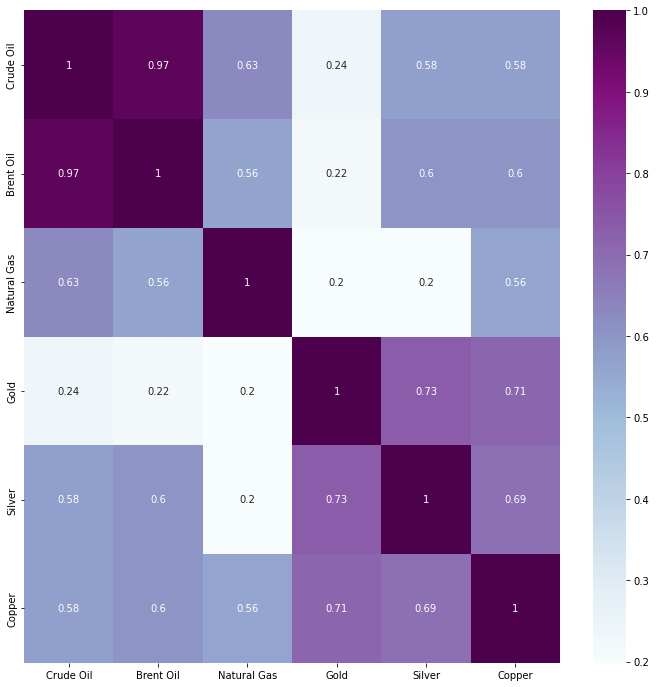

In [44]:

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

* Crude Oil prices is positively correlated with Brent Oil,Natural Gas, Silver and Copper.
* Brent Oil and Crude Oil are highly positive correlated.
* Brent Oil is  positively correlated with Natural Gas , Silver and Copper.
* Natural Gas is  positively correlated with Brent Oil , Crude Oil and Copper.
* Gold prices is  positively correlated with Silver and Copper.
* Silver is positively correlated with Brent Oil , Crude Oil , Gold and Copper.
* Copper is positively correlated with Brent Oil , Crude Oil , Gold and Copper.
* Copper is positively correlated with all others.


## Correlation Between the Commodities for the  last 5 Years

In [97]:
# df_last5=df[df["Year"]>=2017]
df_last5.head()

,Date,Year,Month,Day,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
3009,2017-01-08,2017.0,1.0,8.0,NaN,NaN,NaN,NaN,16.557,NaN
3008,2017-01-22,2017.0,1.0,22.0,NaN,NaN,NaN,NaN,17.182,NaN
3007,2017-01-29,2017.0,1.0,29.0,NaN,NaN,NaN,NaN,17.218,NaN
3006,2017-02-05,2017.0,2.0,5.0,NaN,NaN,NaN,NaN,17.487,NaN
3005,2017-02-12,2017.0,2.0,12.0,NaN,NaN,NaN,NaN,17.932,NaN


In [100]:
df_last5[["Crude Oil","Brent Oil","Natural Gas","Gold","Silver","Copper"]].corr(method='pearson')

,Crude Oil,Brent Oil,Natural Gas,Gold,Silver,Copper
Crude Oil,1.000000,0.905195,0.889803,0.314454,0.345724,0.727303
Brent Oil,0.905195,1.000000,0.758360,0.123502,0.209657,0.670377
Natural Gas,0.889803,0.758360,1.000000,0.276335,0.320355,0.658360
Gold,0.314454,0.123502,0.276335,1.000000,0.870200,0.634300
Silver,0.345724,0.209657,0.320355,0.870200,1.000000,0.763956
Copper,0.727303,0.670377,0.658360,0.634300,0.763956,1.000000


<AxesSubplot:>

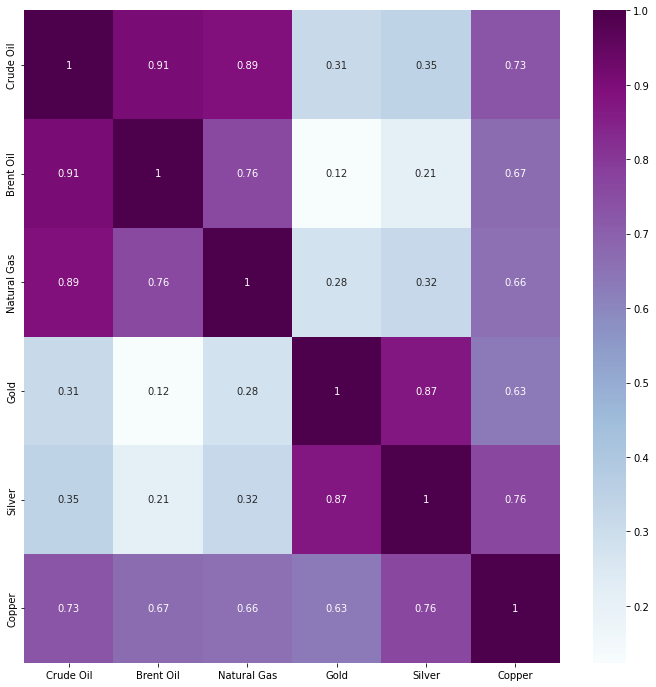

In [101]:
plt.figure(figsize=(12,12))
sns.heatmap(df_last5[["Crude Oil","Brent Oil","Natural Gas","Gold","Silver","Copper"]].corr(method='pearson'),cbar=True,cmap='BuPu',annot=True)

###  From Last 5 Years
* Crude Oil prices is highly positively correlated with Brent Oil and Natural Gas 
* Crude Oil prices is positively correlated with Copper.
* Brent Oil and Crude Oil are highly positive correlated.
* Brent Oil is  positively correlated with Natural Gas and Copper.
* Natural Gas is  positively correlated with Brent Oil , Crude Oil and Copper.
* Gold prices is highly positively correlated with Silver 
* Gold prices is  positively correlated with Silver and Copper.
* Silver is positively correlated with Gold and Copper.
* Copper is positively correlated with Brent Oil , Crude Oil , Gold and Copper.
* Copper is positively correlated with all others.

In [36]:
sns.scatterplot??

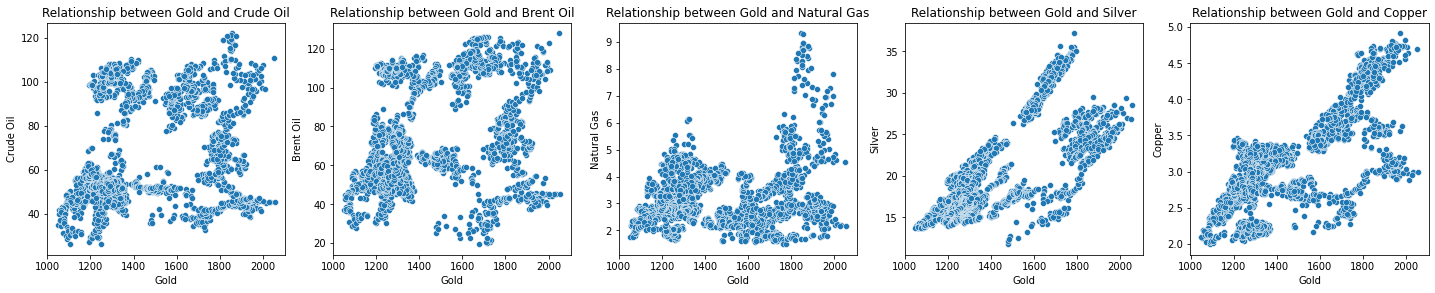

In [49]:
plt.figure(figsize=(35,35))
j=0

for i in enumerate(df): 
    if i[1]!="Gold" and i[1]!="Date":
        j+=1
#         print(i[0])
#         plt.figure(figsize=(10,10))
        plt.subplot(7,7,j+1)
        sns.scatterplot(y=df[i[1]],x=df["Gold"])
        plt.title('Relationship between Gold and '+str(i[1]))



In [78]:
plt.subplot??

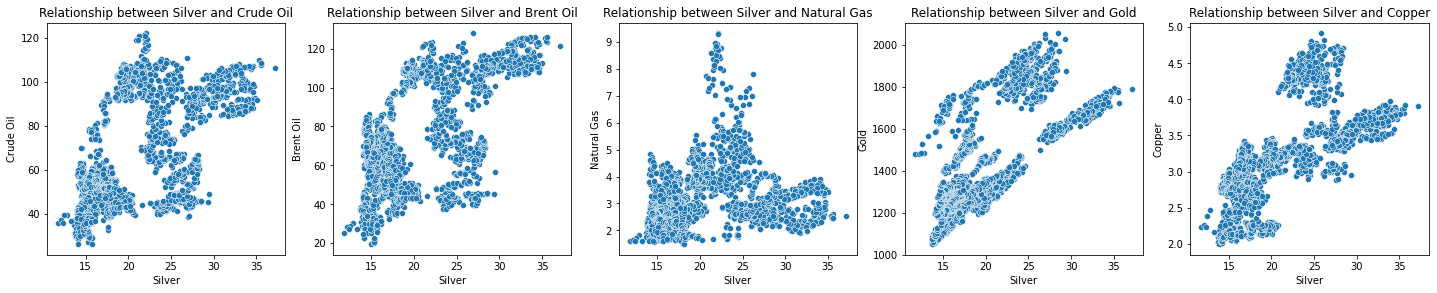

In [50]:
plt.figure(figsize=(35,35))
j=0
for i in enumerate(df): 
    if i[1]!="Silver" and i[1]!="Date":
        j+=1
        plt.subplot(7,7,j+1)
        sns.scatterplot(y=df[i[1]],x=df["Silver"])
        plt.title('Relationship between Silver and '+str(i[1]))

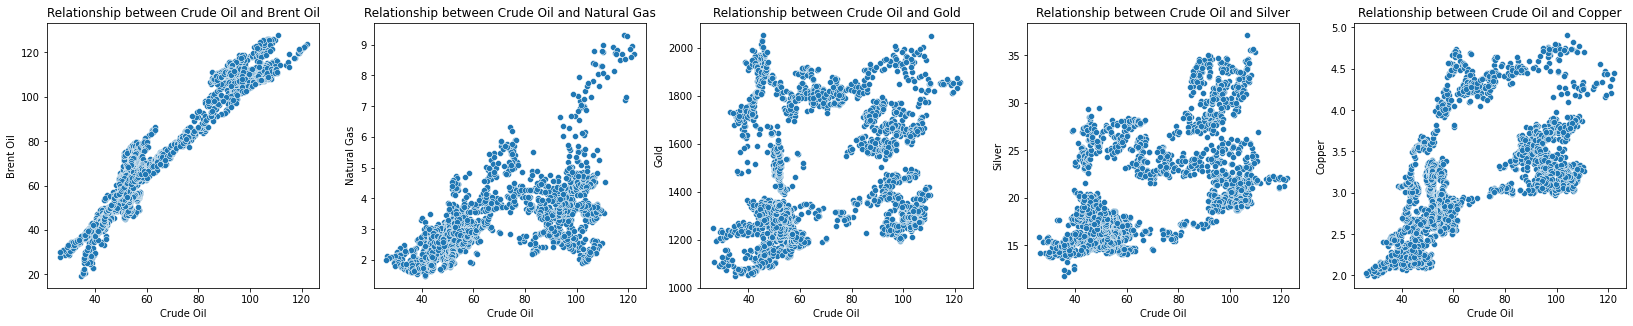

In [51]:
plt.figure(figsize=(40,40))
j=0
for i in enumerate(df): 
    if i[1]!="Crude Oil" and i[1]!="Date":
        j+=1
        plt.subplot(7,7,j+2)
        sns.scatterplot(y=df[i[1]],x=df["Crude Oil"])
        plt.title('Relationship between Crude Oil and '+str(i[1]))

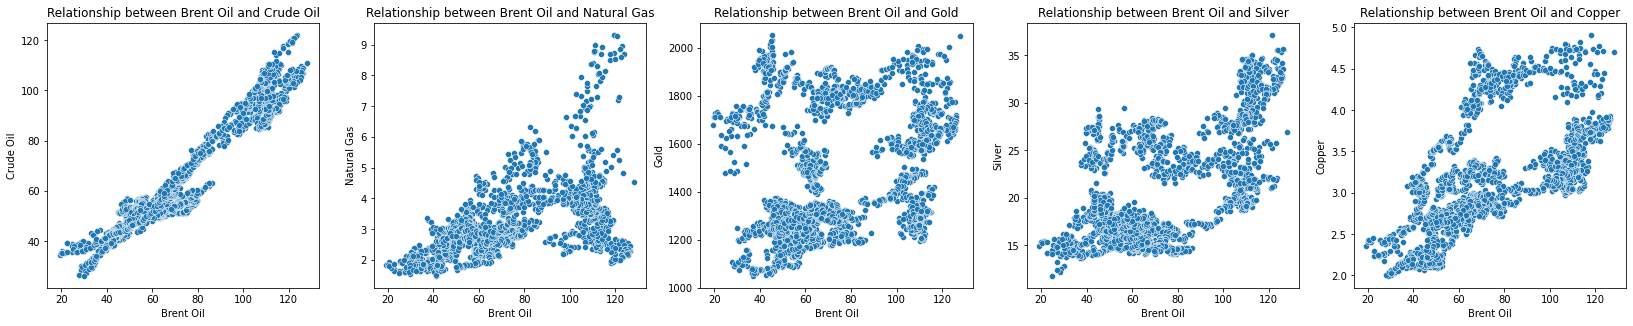

In [52]:
plt.figure(figsize=(40,40))
j=0
for i in enumerate(df): 
    if i[1]!="Brent Oil" and i[1]!="Date":
        j+=1
        plt.subplot(7,7,j+2)
        sns.scatterplot(y=df[i[1]],x=df["Brent Oil"])
        plt.title('Relationship between Brent Oil and '+str(i[1]))

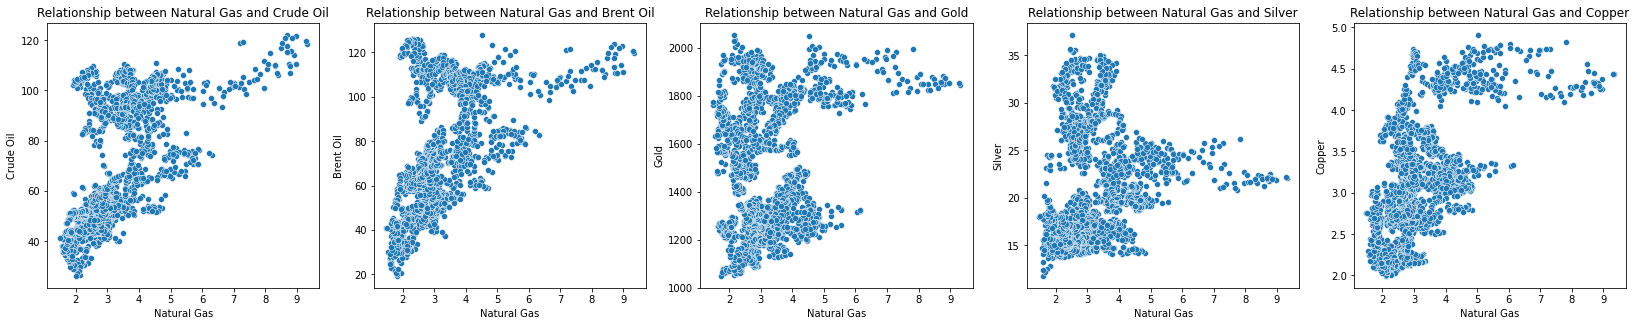

In [53]:
plt.figure(figsize=(40,40))
j=0
for i in enumerate(df): 
    if i[1]!="Natural Gas" and i[1]!="Date":
        j+=1
        plt.subplot(7,7,j+2)
        sns.scatterplot(y=df[i[1]],x=df["Natural Gas"])
        plt.title('Relationship between Natural Gas and '+str(i[1]))

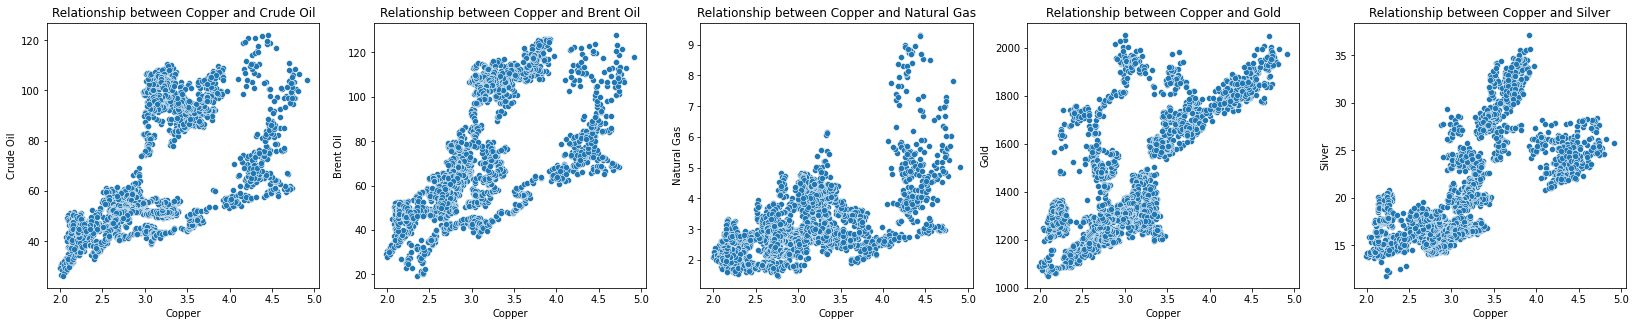

In [54]:
plt.figure(figsize=(40,40))
j=0
for i in enumerate(df): 
    if i[1]!="Copper" and i[1]!="Date":
        j+=1
        plt.subplot(7,7,j+2)
        sns.scatterplot(y=df[i[1]],x=df["Copper"])
        plt.title('Relationship between Copper and '+str(i[1]))

# 3. Data  Cleaning,Preprocessing and Training
We will take the last 500 days data as testing data and the remaining will be used to train the model.

#  Gold Prices Forecasting Using LSTM

In [112]:
df_Gold=df[['Date','Gold']]
df_Gold.head()

,Date,Gold
3258,2012-01-02,NaN
3257,2012-01-08,NaN
3256,2012-01-15,NaN
3255,2012-01-22,NaN
3254,2012-01-29,NaN


In [145]:
df_Gold=df_Gold.dropna()

In [146]:
df_Gold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2742 entries, 2751 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2742 non-null   datetime64[ns]
 1   Gold    2742 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 64.3 KB


In [147]:
prediction_days = 500
df_train_g= df_Gold['Gold'][:len(df_Gold['Gold'])-prediction_days].values.reshape(-1,1)
df_test_g= df_Gold['Gold'][len(df_Gold['Gold'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train_g)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test_g)

The use of prior time steps to predict the next time step is called the sliding window method. For short, it may be called the window method in some literature. In statistics and time series analysis, this is called a lag or lag method.

The number of previous time steps is called the window width or size of the lag.

Here we have used a window of 30 days.

In [148]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

In [149]:
trainX.shape


(2212, 30)

In [150]:
testX.shape


(470, 30)

In [151]:
testX[150]

array([0.32999722, 0.25660272, 0.26160689, 0.26800111, 0.35168196,
       0.34473172, 0.32388101, 0.26800111, 0.14178482, 0.12427023,
       0.15401724, 0.10480956, 0.06338616, 0.05949402, 0.        ,
       0.10675563, 0.11787601, 0.11787601, 0.10647762, 0.13344454,
       0.13789269, 0.12621629, 0.14261885, 0.16819572, 0.15929942,
       0.1234362 , 0.14484292, 0.12232416, 0.14206283, 0.08701696])

In [152]:
trainX[0]

array([0.2840709 , 0.27937551, 0.1960324 , 0.10012912, 0.28166451,
       0.26787182, 0.81101068, 1.        , 0.89259303, 0.64561568,
       0.65993661, 0.66874046, 0.66486677, 0.65477169, 0.68235708,
       0.69198263, 0.70149079, 0.68165278, 0.71076417, 0.71581171,
       0.70947294, 0.72074187, 0.73752788, 0.72132879, 0.76311774,
       0.79422467, 0.80068083, 0.79974175, 0.80772391, 0.81864069])

In [153]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [159]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( trainX.shape[1], trainX.shape[2]), bias_regularizer = L1L2(0.009, 0.004)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss=root_mean_squared_error, optimizer='adam',metrics = ['mse'])
    
    return model

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials = 10, executions_per_trial =1,directory = "./gold2/")

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]

tuner.search(x=trainX, y=trainY, epochs = 200, batch_size =512, validation_data=(testX, testY), callbacks=[callbacks],shuffle = True)


Trial 10 Complete [00h 00m 51s]
val_loss: 0.6047760844230652

Best val_loss So Far: 0.26967498660087585
Total elapsed time: 00h 11m 37s
INFO:tensorflow:Oracle triggered exit


In [160]:
tuner.results_summary()

Results summary
Results in ./gold2/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 64
n_layers: 3
lstm_0_units: 128
Dropout_rate: 0.1
dense_activation: relu
lstm_1_units: 288
lstm_2_units: 224
lstm_3_units: 288
Score: 0.26967498660087585
Trial summary
Hyperparameters:
input_unit: 128
n_layers: 2
lstm_0_units: 160
Dropout_rate: 0.05
dense_activation: sigmoid
lstm_1_units: 32
Score: 0.33278751373291016
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 2
lstm_0_units: 288
Dropout_rate: 0.45
dense_activation: sigmoid
lstm_1_units: 448
lstm_2_units: 352
lstm_3_units: 96
Score: 0.40133965015411377
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 3
lstm_0_units: 288
Dropout_rate: 0.4
dense_activation: relu
lstm_1_units: 448
lstm_2_units: 32
Score: 0.4020223915576935
Trial summary
Hyperparameters:
input_unit: 224
n_layers: 4
lstm_0_units: 96
Dropout_rate: 0.1
dense_activation: sigmoid
lstm_1_units: 256
lstm_2_units: 256
lstm_3_units: 128
Score:

In [161]:
best_model = tuner.get_best_models(num_models=1)[0]

In [162]:
history = best_model.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

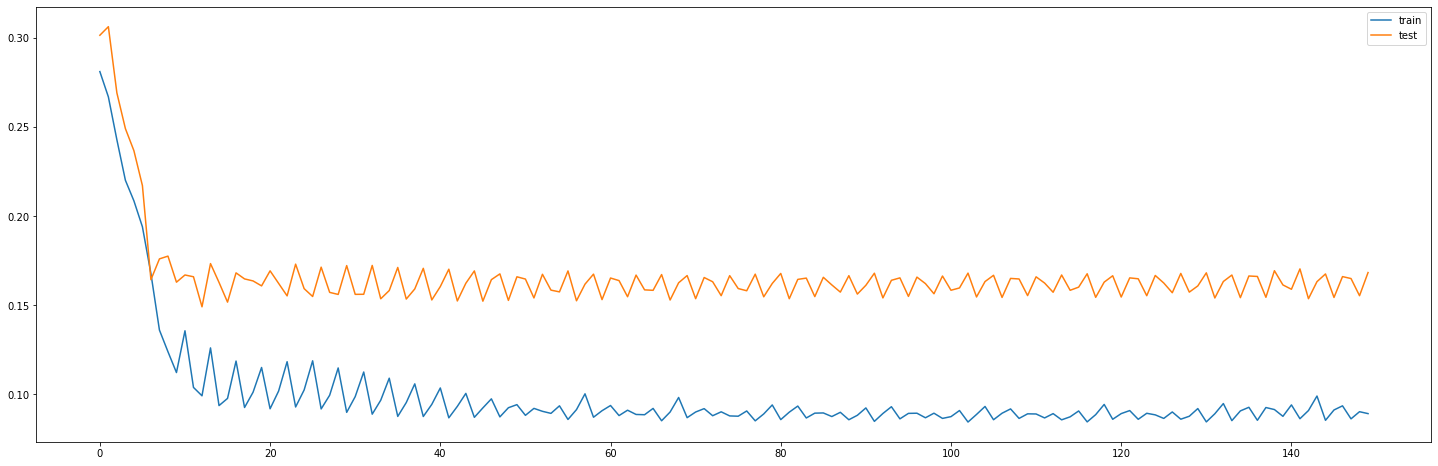

In [163]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


In [165]:
predicted_gold_price = best_model.predict(testX)

In [166]:
predicted_gold_price = scaler_test.inverse_transform(predicted_gold_price.reshape(-1, 1))

In [167]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

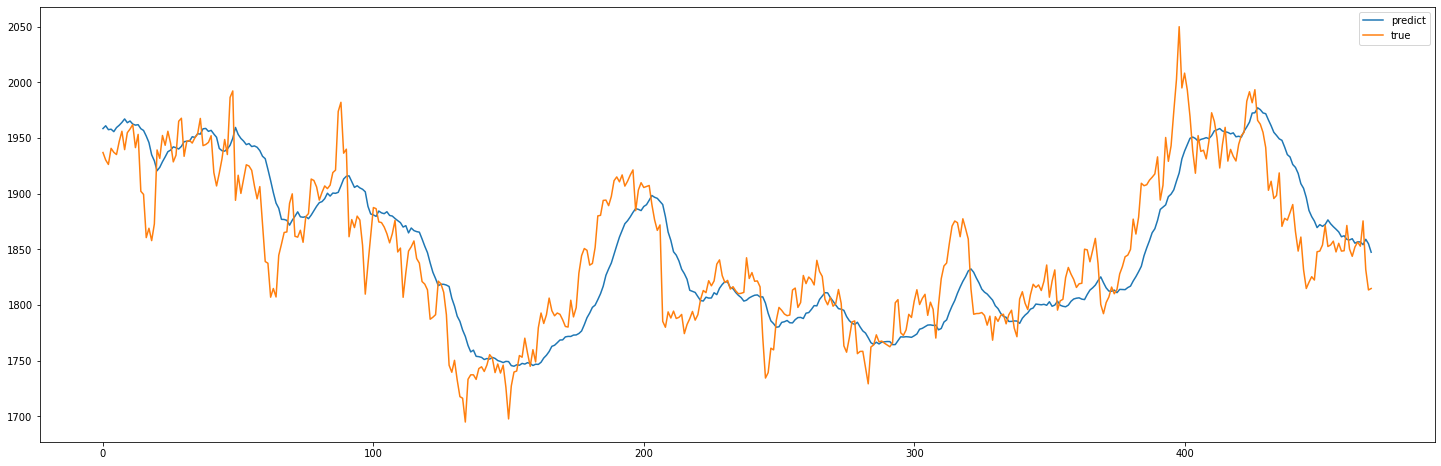

In [168]:
plt.plot(predicted_gold_price, label='predict')
plt.plot(true, label='true')
plt.legend()
plt.show()

In [171]:
# evaluate the model
scores = best_model.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

mse: 0.27%


In [182]:
best_model.save("models/goldPriceModel.h5")
print("Saved model to disk")

Saved model to disk


In [186]:
# load json and create model
# load model
model_g = load_model("models/goldPriceModel.h5", custom_objects={'root_mean_squared_error':                   
root_mean_squared_error})
print("dd")
# summarize model.
model_g.summary()
score = model_g.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model_g.metrics_names[1], score[1]*100))

dd
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             24320     
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 1, 288)            480384    
                                                                 
 lstm_3 (LSTM)               (None, 1, 224)            459648    
                                                                 
 dropout (Dropout)           (None, 1, 224)            0         
                                                                 
 dense (Dense)               (None, 1, 1)              225       
                                                                 
Total params: 1,063,393
Trainable params: 1,063,393
N

# Silver Prices Forecasting Using LSTM

In [226]:
df_Silver=df[['Date','Silver']]
df_Silver.head()

,Date,Silver
3258,2012-01-02,28.160
3257,2012-01-08,28.848
3256,2012-01-15,29.785
3255,2012-01-22,31.793
3254,2012-01-29,33.908


In [228]:
df_Silver=df_Silver.dropna()

In [227]:
df_Silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 3258 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3259 non-null   datetime64[ns]
 1   Silver  3256 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.1 KB


In [229]:
prediction_days = 500
df_train_S= df_Silver['Silver'][:len(df_Silver['Silver'])-prediction_days].values.reshape(-1,1)
df_test_S= df_Silver['Silver'][len(df_Silver['Silver'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train_S)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test_S)

 The use of prior time steps to predict the next time step is called the sliding window method. For short, it may be called the window method in some literature. In statistics and time series analysis, this is called a lag or lag method.

The number of previous time steps is called the window width or size of the lag.

Here we have used a window of 30 days.

In [230]:
trainX=[]
trainY=[]

In [231]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

In [232]:
trainX.shape


(2726, 30)

In [233]:
trainY.shape

(2726,)

In [234]:
testX.shape

(470, 30)

In [235]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [265]:
testX.shape

(470, 1, 30)

In [236]:
trainX.shape

(2726, 1, 30)

In [237]:
trainY.shape

(2726,)

In [238]:
trainX[12],testX[10]

(array([[0.81224377, 0.81563387, 0.79237622, 0.77412488, 0.78555661,
         0.77294229, 0.72457427, 0.67096342, 0.66749448, 0.66284295,
         0.65239672, 0.67589089, 0.66276411, 0.58833964, 0.62078209,
         0.59890413, 0.61518448, 0.60769473, 0.6255913 , 0.62996689,
         0.64325134, 0.64266004, 0.7557947 , 0.78378272, 0.86400189,
         0.90610218, 0.89526175, 0.88974298, 0.89758751, 0.84271523]]),
 array([[0.613521  , 0.71296724, 0.88797877, 0.78703276, 0.98500231,
         0.6145593 , 0.60567605, 0.80629903, 0.61836641, 0.80110752,
         0.84702353, 0.76280572, 0.74053992, 0.6939317 , 0.67928011,
         0.64086294, 0.77768805, 0.7287725 , 0.80260729, 0.89490078,
         0.90009229, 0.75796031, 0.69854638, 0.67904938, 0.72335025,
         0.72588832, 0.71227503, 0.72311952, 0.74711583, 0.69681587]]))

In [242]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( trainX.shape[1], trainX.shape[2]), bias_regularizer = L1L2(0.009, 0.004)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss=root_mean_squared_error, optimizer='adam',metrics = ['mse'])
    
    return model

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials = 10, executions_per_trial =1,directory = "./silver/")

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]

tuner.search(x=trainX, y=trainY, epochs = 200, batch_size =512, validation_data=(testX, testY), callbacks=[callbacks],shuffle = True)


Trial 10 Complete [00h 00m 53s]
val_loss: 0.2564253509044647

Best val_loss So Far: 0.2499416321516037
Total elapsed time: 00h 09m 05s
INFO:tensorflow:Oracle triggered exit


In [243]:
tuner.results_summary()

Results summary
Results in ./silver/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 4
lstm_0_units: 480
Dropout_rate: 0.0
dense_activation: relu
lstm_1_units: 416
lstm_2_units: 480
lstm_3_units: 192
Score: 0.2499416321516037
Trial summary
Hyperparameters:
input_unit: 224
n_layers: 2
lstm_0_units: 64
Dropout_rate: 0.25
dense_activation: relu
lstm_1_units: 320
lstm_2_units: 480
lstm_3_units: 64
Score: 0.25142303109169006
Trial summary
Hyperparameters:
input_unit: 384
n_layers: 3
lstm_0_units: 480
Dropout_rate: 0.25
dense_activation: sigmoid
lstm_1_units: 96
lstm_2_units: 320
lstm_3_units: 352
Score: 0.25277945399284363
Trial summary
Hyperparameters:
input_unit: 160
n_layers: 2
lstm_0_units: 96
Dropout_rate: 0.35000000000000003
dense_activation: sigmoid
lstm_1_units: 480
lstm_2_units: 288
lstm_3_units: 160
Score: 0.25377699732780457
Trial summary
Hyperparameters:
input_unit: 224
n_layers: 2
lstm_0_units: 160
Dropout_rate: 0.3500000000000000

In [269]:
best_model_S = tuner.get_best_models(num_models=1)[0]

In [270]:
history = best_model_S.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

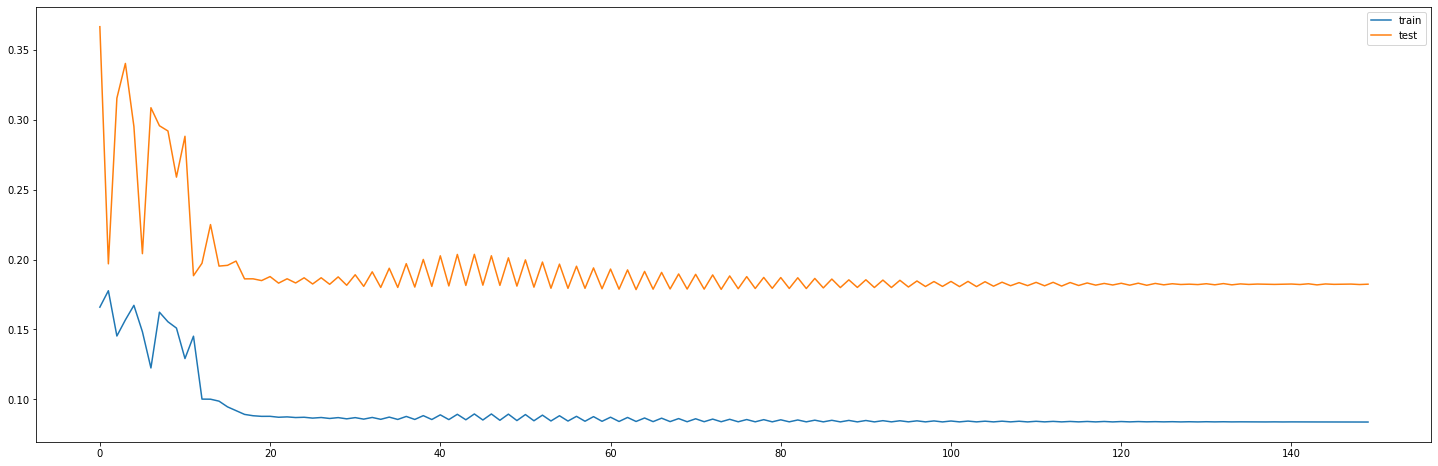

In [271]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [293]:
predicted_silver_price = best_model_S.predict(testX)

In [294]:
predicted_silver_price = scaler_test.inverse_transform(predicted_silver_price.reshape(-1, 1))

In [295]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

In [291]:
predicted_silver_price.shape

(470, 1)

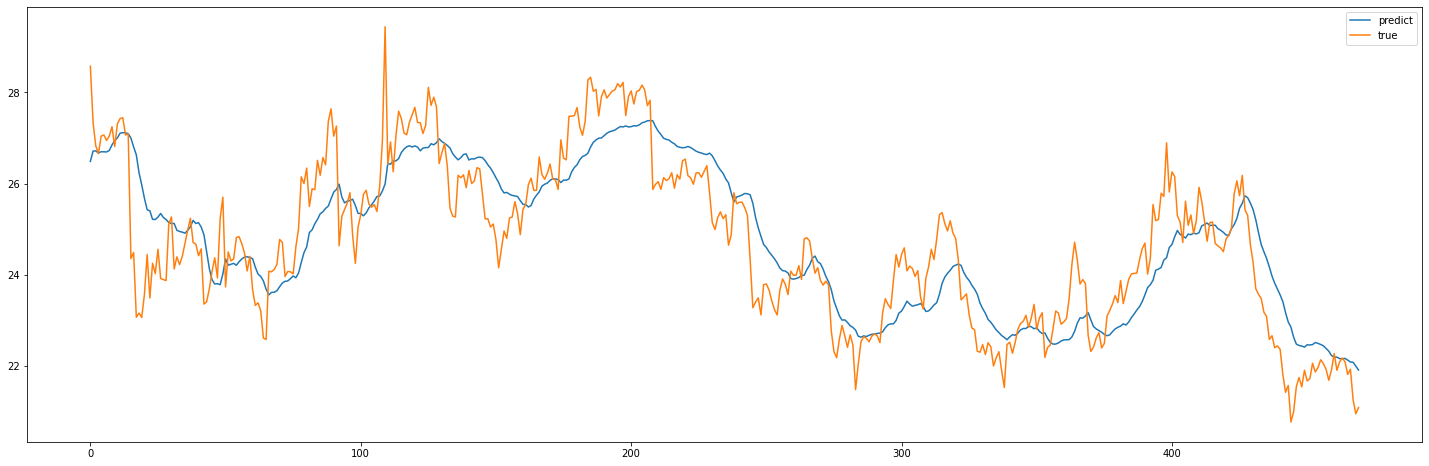

In [297]:
plt.plot(predicted_silver_price, label='predict')
plt.plot(true, label='true')
plt.legend()
plt.show()

In [261]:
# evaluate the model
scores = best_model_S.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

mse: 0.40%


In [262]:
best_model_S.save("models/silverPriceModel.h5")
print("Saved model to disk")

Saved model to disk


In [312]:
# load json and create model
# load model
model_s = load_model("models/silverPriceModel.h5", custom_objects={'root_mean_squared_error':                   
root_mean_squared_error})
print("dd")
# summarize model.
model_s.summary()
score = model_s.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model_s.metrics_names[1], score[1]*100))

dd
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 192)            171264    
                                                                 
 lstm_1 (LSTM)               (None, 1, 480)            1292160   
                                                                 
 lstm_2 (LSTM)               (None, 1, 416)            1492608   
                                                                 
 lstm_3 (LSTM)               (None, 1, 480)            1722240   
                                                                 
 lstm_4 (LSTM)               (None, 1, 192)            516864    
                                                                 
 dropout (Dropout)           (None, 1, 192)            0         
                                                                 
 dense (Dense)               (None, 1, 1)            

# Crude Oil Prices Forecasting Using LSTM

In [249]:
df_Crude=df[['Date','Crude Oil']]
df_Crude.head()

,Date,Crude Oil
3258,2012-01-02,NaN
3257,2012-01-08,NaN
3256,2012-01-15,NaN
3255,2012-01-22,NaN
3254,2012-01-29,NaN


In [299]:
df_Crude=df_Crude.dropna()

In [300]:
prediction_days = 500
df_train_Cr= df_Crude['Crude Oil'][:len(df_Crude['Crude Oil'])-prediction_days].values.reshape(-1,1)
df_test_Cr= df_Crude['Crude Oil'][len(df_Crude['Crude Oil'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train_Cr)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test_Cr)

In [301]:
def create_dataset(dataset, look_back=30):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

In [305]:
trainX.shape,trainY.shape


((2204, 30), (2204,))

In [304]:
testX.shape

(470, 30)

In [306]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [308]:
testX.shape,testY.shape

((470, 1, 30), (470,))

In [309]:
trainX.shape,trainY.shape

((2204, 1, 30), (2204,))

In [310]:
trainX[12],testX[10]

(array([[0.85685484, 0.87013757, 0.86266603, 0.86800285, 0.87156072,
         0.86990038, 0.86064991, 0.85709203, 0.84677419, 0.83194972,
         0.8495019 , 0.83847249, 0.85626186, 0.85981973, 0.87322106,
         0.85934535, 0.88591082, 0.88389469, 0.89646584, 0.90251423,
         0.91354364, 0.94437856, 0.94959677, 0.96797913, 0.99098672,
         0.97663662, 0.95279886, 0.95896584, 0.97995731, 0.9545778 ]]),
 array([[0.0800144 , 0.0815739 , 0.07401631, 0.07737524, 0.07365643,
         0.0815739 , 0.07953455, 0.07809501, 0.08517274, 0.0846929 ,
         0.08589251, 0.08409309, 0.08037428, 0.08661228, 0.0909309 ,
         0.08997121, 0.08433301, 0.08901152, 0.08289347, 0.08709213,
         0.07893474, 0.08097409, 0.07173704, 0.        , 0.00539827,
         0.04690499, 0.05602207, 0.05230326, 0.05038388, 0.05146353]]))

In [311]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( trainX.shape[1], trainX.shape[2]), bias_regularizer = L1L2(0.009, 0.004)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss=root_mean_squared_error, optimizer='adam',metrics = ['mse'])
    
    return model

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials = 10, executions_per_trial =1,directory = "./Training/Crude/")

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]

tuner.search(x=trainX, y=trainY, epochs = 200, batch_size =512, validation_data=(testX, testY), callbacks=[callbacks],shuffle = True)


Trial 10 Complete [00h 01m 22s]
val_loss: 0.40415364503860474

Best val_loss So Far: 0.3349001109600067
Total elapsed time: 00h 10m 29s
INFO:tensorflow:Oracle triggered exit


In [314]:
tuner.results_summary()

Results summary
Results in ./Training/Crude/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 64
n_layers: 3
lstm_0_units: 224
Dropout_rate: 0.30000000000000004
dense_activation: sigmoid
lstm_1_units: 192
lstm_2_units: 64
lstm_3_units: 224
Score: 0.3349001109600067
Trial summary
Hyperparameters:
input_unit: 96
n_layers: 3
lstm_0_units: 448
Dropout_rate: 0.15000000000000002
dense_activation: sigmoid
lstm_1_units: 320
lstm_2_units: 96
Score: 0.36759400367736816
Trial summary
Hyperparameters:
input_unit: 128
n_layers: 2
lstm_0_units: 384
Dropout_rate: 0.4
dense_activation: sigmoid
lstm_1_units: 288
lstm_2_units: 480
lstm_3_units: 448
Score: 0.40274688601493835
Trial summary
Hyperparameters:
input_unit: 128
n_layers: 3
lstm_0_units: 384
Dropout_rate: 0.45
dense_activation: sigmoid
lstm_1_units: 320
lstm_2_units: 288
lstm_3_units: 96
Score: 0.40415364503860474
Trial summary
Hyperparameters:
input_unit: 160
n_layers: 3
lstm_0_units: 384
Dropout_rate: 0.4
dens

In [315]:
best_model_Cr = tuner.get_best_models(num_models=1)[0]

In [316]:
history = best_model_Cr.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

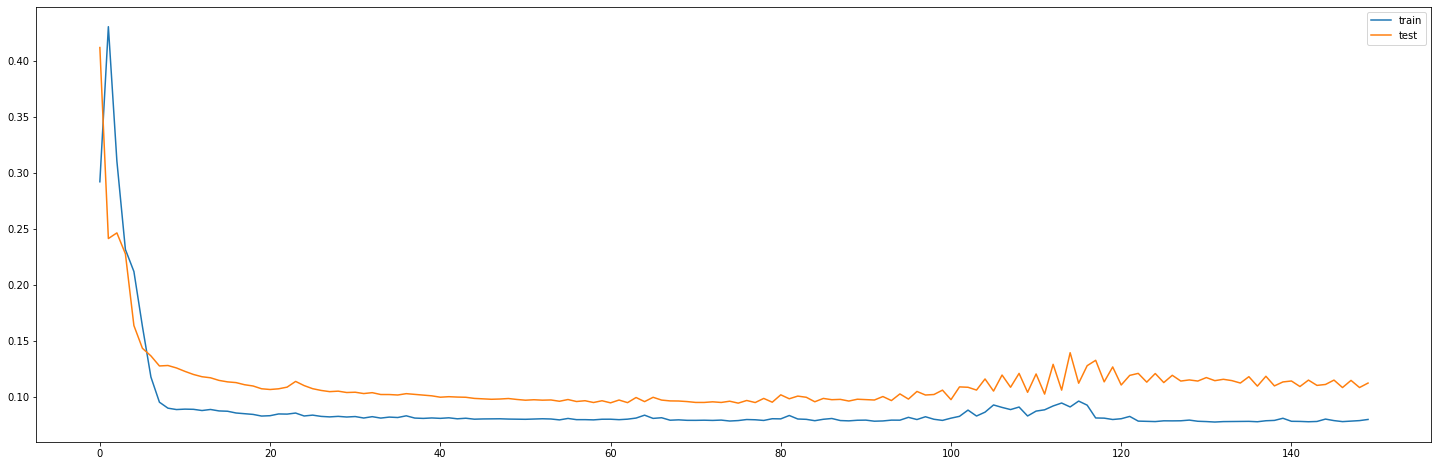

In [317]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [318]:
predicted_crude_price = best_model_Cr.predict(testX)

In [319]:
predicted_crude_price = scaler_test.inverse_transform(predicted_crude_price.reshape(-1, 1))

In [320]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

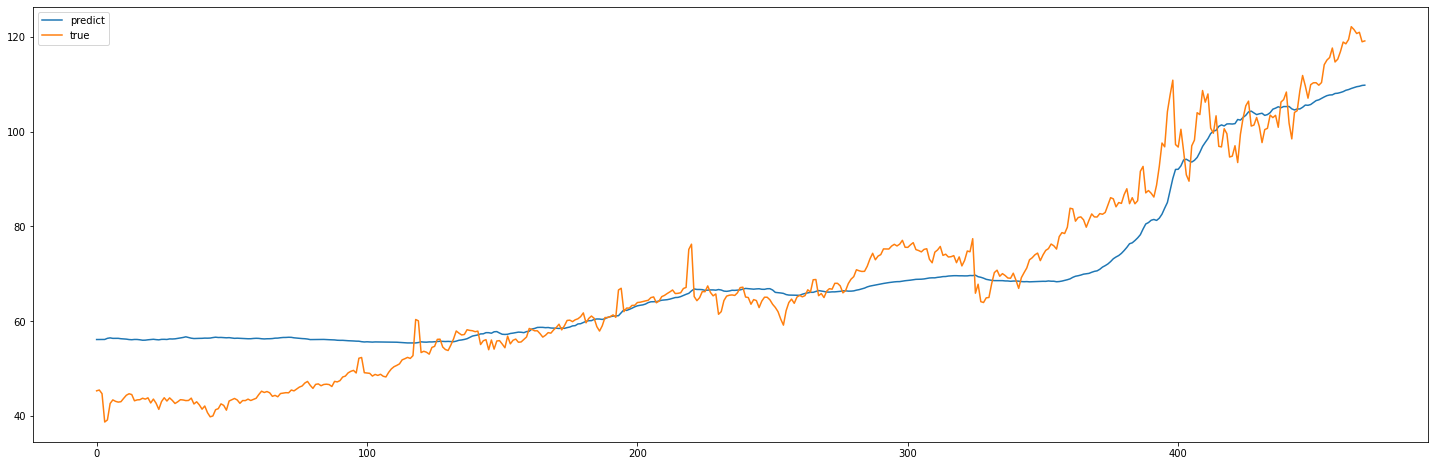

In [321]:
plt.plot(predicted_crude_price, label='predict')
plt.plot(true, label='true')
plt.legend()
plt.show()

In [322]:
# evaluate the model
scores = best_model_Cr.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

mse: 0.34%


In [323]:
best_model_Cr.save("models/crudePriceModel.h5")
print("Saved model to disk")

Saved model to disk


In [324]:
# load json and create model
# load model
model_cr = load_model("models/crudePriceModel.h5", custom_objects={'root_mean_squared_error':                   
root_mean_squared_error})
print("dd")
# summarize model.
model_cr.summary()
score = model_cr.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model_cr.metrics_names[1], score[1]*100))

dd
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             24320     
                                                                 
 lstm_1 (LSTM)               (None, 1, 224)            258944    
                                                                 
 lstm_2 (LSTM)               (None, 1, 192)            320256    
                                                                 
 lstm_3 (LSTM)               (None, 1, 64)             65792     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 dense (Dense)               (None, 1, 1)              65        
                                                                 
Total params: 669,377
Trainable params: 669,377
Non-t

# Brent Oil Prices Forecasting Using LSTM
 

In [313]:
df_Brent=df[['Date','Brent Oil']]
df_Brent.head()

,Date,Brent Oil
3258,2012-01-02,NaN
3257,2012-01-08,NaN
3256,2012-01-15,NaN
3255,2012-01-22,NaN
3254,2012-01-29,NaN


In [325]:
df_Brent=df_Brent.dropna()

In [326]:
df_Brent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 2743 to 0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2701 non-null   datetime64[ns]
 1   Brent Oil  2701 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.3 KB


In [338]:
prediction_days = 500
df_train_B= df_Brent['Brent Oil'][:len(df_Brent['Brent Oil'])-prediction_days].values.reshape(-1,1)
df_test_B= df_Brent['Brent Oil'][len(df_Brent['Brent Oil'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train_B)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test_B)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)
trainX.shape,trainY.shape,testX.shape,testY.shape

((2171, 30), (2171,), (470, 30), (470,))

In [339]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape,trainY.shape,testX.shape,testY.shape

((2171, 1, 30), (2171,), (470, 1, 30), (470,))

In [340]:
trainX[12],testX[10]

(array([[0.87388904, 0.87688278, 0.87117598, 0.87894097, 0.86921134,
         0.86004303, 0.8523716 , 0.862569  , 0.85442979, 0.8627561 ,
         0.84694546, 0.85368135, 0.84853588, 0.84647769, 0.85564599,
         0.86191412, 0.85527177, 0.85742352, 0.86284966, 0.86762092,
         0.891103  , 0.90373281, 0.90653943, 0.91561418, 0.92861821,
         0.91664328, 0.92244363, 0.92459538, 0.93179905, 0.94283843]]),
 array([[0.0646266 , 0.06495802, 0.06573133, 0.06363235, 0.06948741,
         0.06053911, 0.06451613, 0.07390632, 0.07699956, 0.08517455,
         0.08429076, 0.07666814, 0.08318604, 0.07777287, 0.08804684,
         0.08285462, 0.08108705, 0.087384  , 0.08837826, 0.087384  ,
         0.08219178, 0.07611578, 0.08473266, 0.09279717, 0.09036677,
         0.08429076, 0.08384887, 0.08638975, 0.08970393, 0.07699956]]))

In [341]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( trainX.shape[1], trainX.shape[2]), bias_regularizer = L1L2(0.009, 0.004)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss=root_mean_squared_error, optimizer='adam',metrics = ['mse'])
    
    return model

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials = 10, executions_per_trial =1,directory = "./Training/Brent/")

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]

tuner.search(x=trainX, y=trainY, epochs = 200, batch_size =512, validation_data=(testX, testY), callbacks=[callbacks],shuffle = True)


Trial 10 Complete [00h 01m 28s]
val_loss: 0.6354608535766602

Best val_loss So Far: 0.29738178849220276
Total elapsed time: 00h 12m 27s
INFO:tensorflow:Oracle triggered exit


In [342]:
tuner.results_summary()

Results summary
Results in ./Training/Brent/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 32
n_layers: 4
lstm_0_units: 64
Dropout_rate: 0.05
dense_activation: sigmoid
lstm_1_units: 32
lstm_2_units: 32
lstm_3_units: 32
Score: 0.29738178849220276
Trial summary
Hyperparameters:
input_unit: 192
n_layers: 2
lstm_0_units: 448
Dropout_rate: 0.30000000000000004
dense_activation: sigmoid
lstm_1_units: 320
lstm_2_units: 224
lstm_3_units: 192
Score: 0.4666562080383301
Trial summary
Hyperparameters:
input_unit: 256
n_layers: 2
lstm_0_units: 96
Dropout_rate: 0.2
dense_activation: sigmoid
lstm_1_units: 320
lstm_2_units: 64
lstm_3_units: 256
Score: 0.5336276292800903
Trial summary
Hyperparameters:
input_unit: 64
n_layers: 3
lstm_0_units: 448
Dropout_rate: 0.1
dense_activation: relu
lstm_1_units: 192
lstm_2_units: 256
lstm_3_units: 160
Score: 0.535353422164917
Trial summary
Hyperparameters:
input_unit: 320
n_layers: 2
lstm_0_units: 128
Dropout_rate: 0.45
dense_acti

In [343]:
best_model_Br = tuner.get_best_models(num_models=1)[0]

In [344]:
history = best_model_Br.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

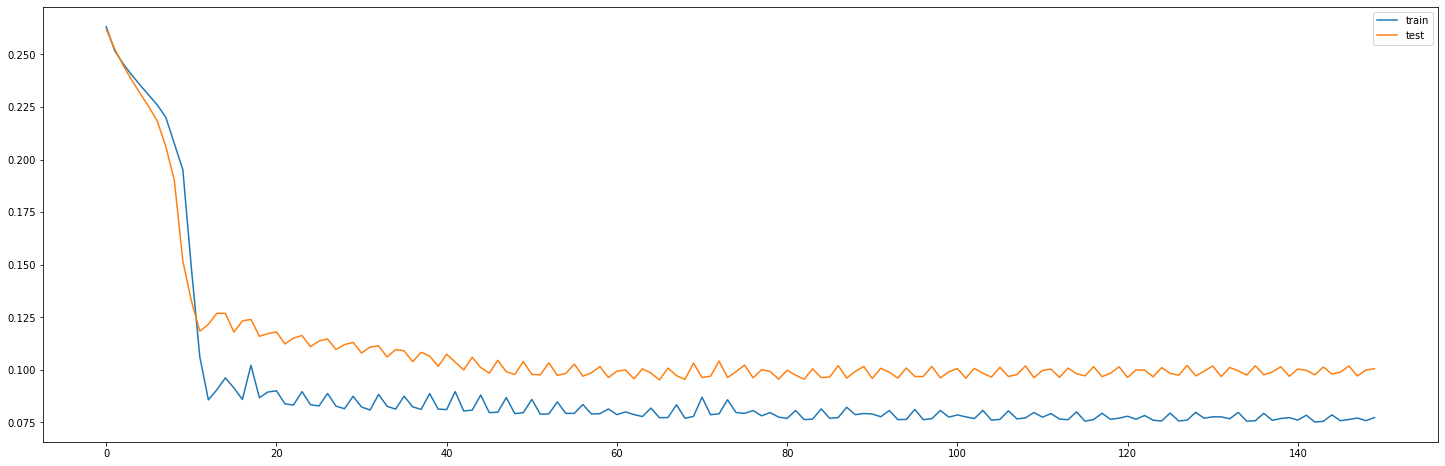

In [345]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [346]:
predicted_brent_price = best_model_Br.predict(testX)

In [347]:
predicted_brent_price = scaler_test.inverse_transform(predicted_brent_price.reshape(-1, 1))

In [348]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

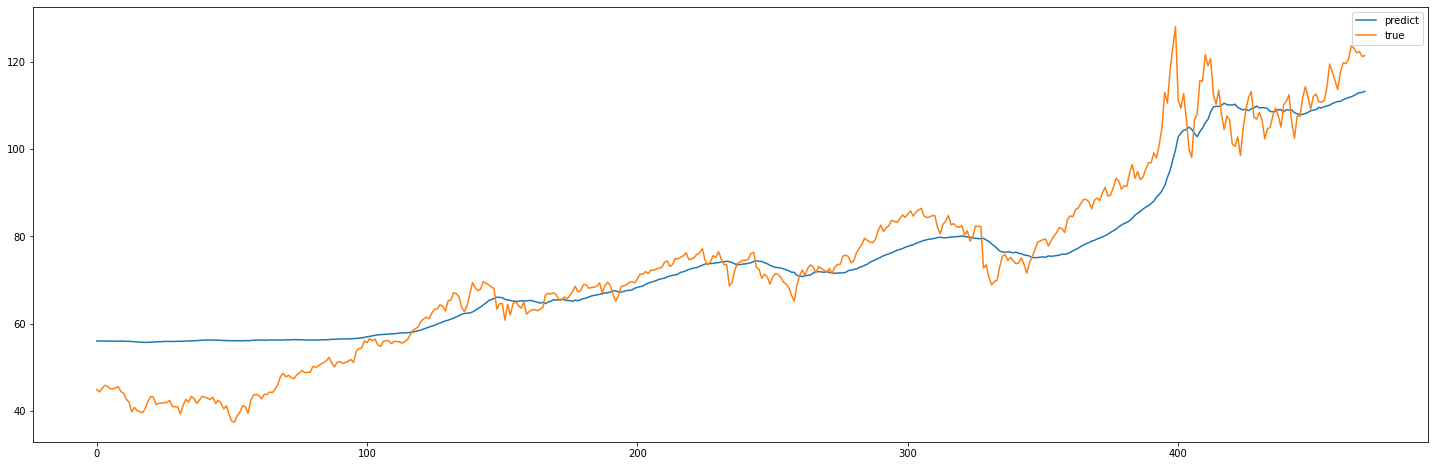

In [349]:
plt.plot(predicted_brent_price, label='predict')
plt.plot(true, label='true')
plt.legend()
plt.show()

In [350]:
# evaluate the model
scores = best_model_Br.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

mse: 0.27%


In [351]:
best_model_Br.save("models/brentPriceModel.h5")
print("Saved model to disk")

Saved model to disk


In [352]:
# load json and create model
# load model
model_br = load_model("models/brentPriceModel.h5", custom_objects={'root_mean_squared_error':                   
root_mean_squared_error})
print("dd")
# summarize model.
model_br.summary()
score = model_br.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model_br.metrics_names[1], score[1]*100))

dd
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 32)             8064      
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             24832     
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             12416     
                                                                 
 lstm_3 (LSTM)               (None, 1, 32)             8320      
                                                                 
 lstm_4 (LSTM)               (None, 1, 32)             8320      
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 dense (Dense)               (None, 1, 1)            

# Natural Gas Prices Forecasting Using LSTM


In [353]:
df_Natural=df[['Date','Natural Gas']]
df_Natural.head()

,Date,Natural Gas
3258,2012-01-02,NaN
3257,2012-01-08,NaN
3256,2012-01-15,NaN
3255,2012-01-22,NaN
3254,2012-01-29,NaN


In [354]:
df_Natural=df_Natural.dropna()

In [356]:
df_Natural.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2733 entries, 2733 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         2733 non-null   datetime64[ns]
 1   Natural Gas  2733 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 64.1 KB


In [355]:
prediction_days = 500
df_train_N= df_Natural['Natural Gas'][:len(df_Natural['Natural Gas'])-prediction_days].values.reshape(-1,1)
df_test_N= df_Natural['Natural Gas'][len(df_Natural['Natural Gas'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train_N)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test_N)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

trainX.shape,trainY.shape,testX.shape,testY.shape

((2203, 30), (2203,), (470, 30), (470,))

In [357]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape,trainY.shape,testX.shape,testY.shape

((2203, 1, 30), (2203,), (470, 1, 30), (470,))

In [358]:
trainX[12],testX[10]

(array([[0.18448682, 0.22348404, 0.22969788, 0.2671952 , 0.24062567,
         0.25626741, 0.26376687, 0.21877009, 0.19284337, 0.22969788,
         0.21791301, 0.2288408 , 0.21212771, 0.20698522, 0.21319906,
         0.21319906, 0.20334262, 0.22498393, 0.202057  , 0.23248339,
         0.25755303, 0.24512535, 0.24876795, 0.244054  , 0.2288408 ,
         0.20655667, 0.22219841, 0.24298264, 0.21019927, 0.21469895]]),
 array([[0.06674519, 0.06334249, 0.07289622, 0.06177202, 0.06412773,
         0.06164115, 0.06556733, 0.08833922, 0.08611438, 0.09632247,
         0.09750033, 0.08781573, 0.10037953, 0.10888627, 0.10574532,
         0.10208088, 0.11752388, 0.12773197, 0.1241984 , 0.11071849,
         0.1053527 , 0.10548358, 0.11870174, 0.11516817, 0.11255071,
         0.09409763, 0.09488287, 0.08402042, 0.07695328, 0.08231907]]))

In [359]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( trainX.shape[1], trainX.shape[2]), bias_regularizer = L1L2(0.009, 0.004)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss=root_mean_squared_error, optimizer='adam',metrics = ['mse'])
    
    return model

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials = 10, executions_per_trial =1,directory = "./Training/Natural/")

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]

tuner.search(x=trainX, y=trainY, epochs = 200, batch_size =512, validation_data=(testX, testY), callbacks=[callbacks],shuffle = True)


Trial 10 Complete [00h 01m 23s]
val_loss: 0.5554751753807068

Best val_loss So Far: 0.2849099636077881
Total elapsed time: 00h 12m 34s
INFO:tensorflow:Oracle triggered exit


In [360]:
tuner.results_summary()

Results summary
Results in ./Training/Natural/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 64
n_layers: 4
lstm_0_units: 128
Dropout_rate: 0.2
dense_activation: relu
lstm_1_units: 192
lstm_2_units: 352
lstm_3_units: 352
Score: 0.2849099636077881
Trial summary
Hyperparameters:
input_unit: 128
n_layers: 2
lstm_0_units: 416
Dropout_rate: 0.0
dense_activation: relu
lstm_1_units: 64
Score: 0.3525985777378082
Trial summary
Hyperparameters:
input_unit: 256
n_layers: 1
lstm_0_units: 448
Dropout_rate: 0.05
dense_activation: sigmoid
lstm_1_units: 256
lstm_2_units: 320
Score: 0.4881179630756378
Trial summary
Hyperparameters:
input_unit: 288
n_layers: 2
lstm_0_units: 256
Dropout_rate: 0.35000000000000003
dense_activation: relu
lstm_1_units: 32
Score: 0.5216823220252991
Trial summary
Hyperparameters:
input_unit: 320
n_layers: 3
lstm_0_units: 352
Dropout_rate: 0.0
dense_activation: relu
lstm_1_units: 352
lstm_2_units: 64
lstm_3_units: 224
Score: 0.555475175380706

In [361]:
best_model_N = tuner.get_best_models(num_models=1)[0]

In [362]:
history = best_model_N.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

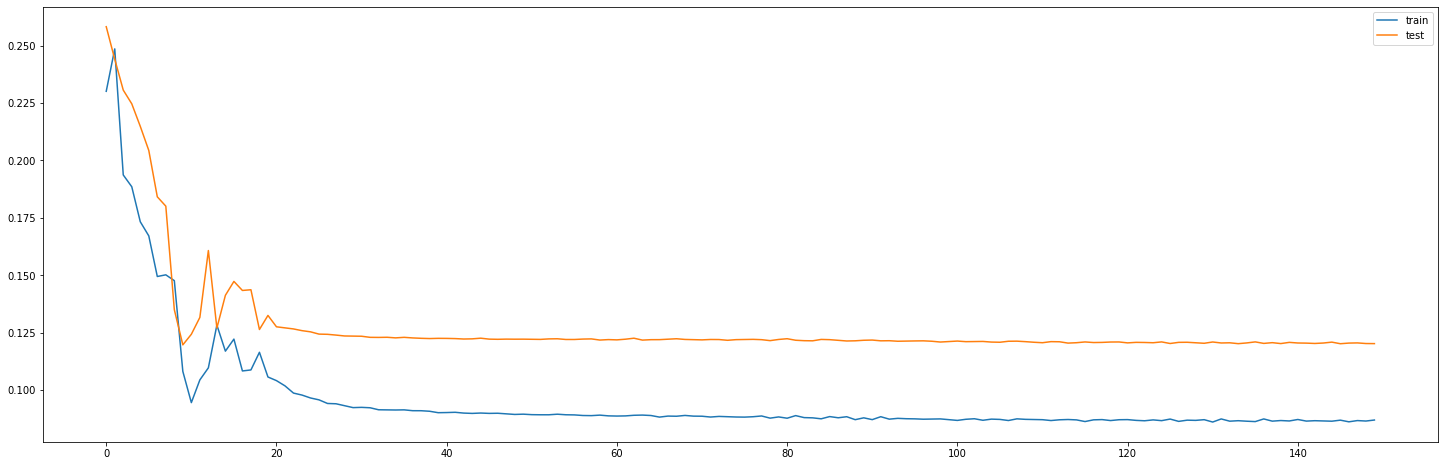

In [363]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [364]:
predicted_naturalGas_price = best_model_N.predict(testX)

In [365]:
predicted_naturalGas_price = scaler_test.inverse_transform(predicted_naturalGas_price.reshape(-1, 1))

In [366]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

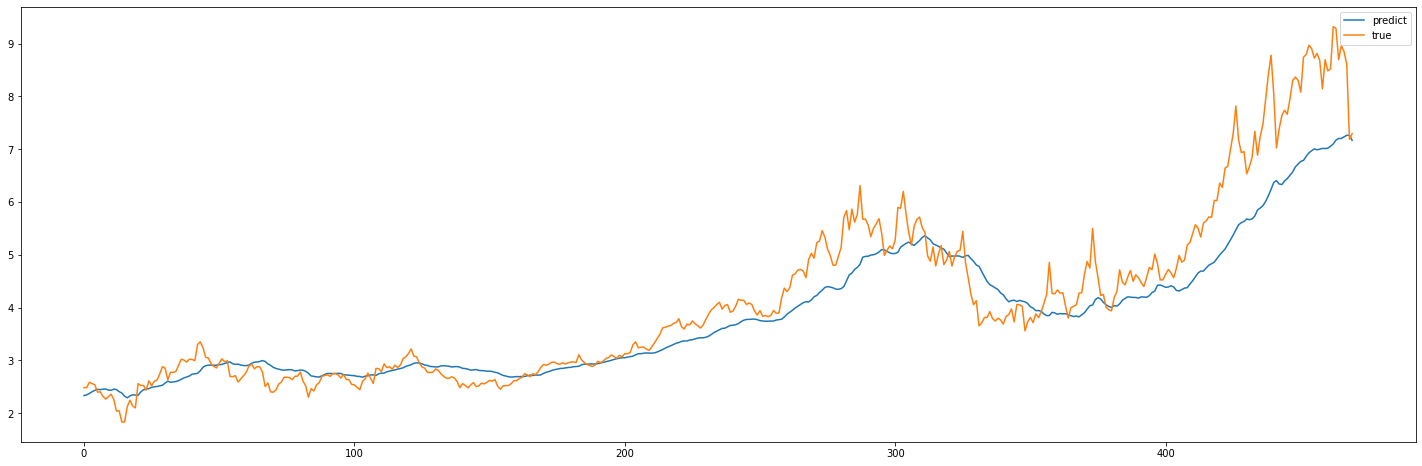

In [367]:
plt.plot(predicted_naturalGas_price, label='predict')
plt.plot(true, label='true')
plt.legend()
plt.show()

In [368]:
# evaluate the model
scores = best_model_N.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

mse: 0.35%


In [369]:
best_model_N.save("models/naturalGasPriceModel.h5")
print("Saved model to disk")

Saved model to disk


In [370]:
# load json and create model
# load model
model_N = load_model("models/naturalGasPriceModel.h5", custom_objects={'root_mean_squared_error':                   
root_mean_squared_error})
print("dd")
# summarize model.
model_N.summary()
score = model_N.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model_br.metrics_names[1], score[1]*100))

dd
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             24320     
                                                                 
 lstm_1 (LSTM)               (None, 1, 128)            98816     
                                                                 
 lstm_2 (LSTM)               (None, 1, 192)            246528    
                                                                 
 lstm_3 (LSTM)               (None, 1, 352)            767360    
                                                                 
 lstm_4 (LSTM)               (None, 1, 352)            992640    
                                                                 
 dropout (Dropout)           (None, 1, 352)            0         
                                                                 
 dense (Dense)               (None, 1, 1)            

# Copper Prices Forecasting Using LSTM


In [371]:
df_Copper=df[['Date','Copper']]
df_Copper.head()

,Date,Copper
3258,2012-01-02,NaN
3257,2012-01-08,NaN
3256,2012-01-15,NaN
3255,2012-01-22,NaN
3254,2012-01-29,NaN


In [372]:
df_Copper=df_Copper.dropna()

In [373]:
df_Copper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2686 entries, 3203 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2686 non-null   datetime64[ns]
 1   Copper  2686 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 63.0 KB


In [374]:
prediction_days = 500
df_train_Co= df_Copper['Copper'][:len(df_Copper['Copper'])-prediction_days].values.reshape(-1,1)
df_test_Co= df_Copper['Copper'][len(df_Copper['Copper'])-prediction_days:].values.reshape(-1,1)

scaler_train = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler_train.fit_transform(df_train_N)

scaler_test = MinMaxScaler(feature_range=(0, 1))
scaled_test = scaler_test.fit_transform(df_test_N)

trainX, trainY = create_dataset(scaled_train)
testX, testY = create_dataset(scaled_test)

trainX.shape,trainY.shape,testX.shape,testY.shape

((2203, 30), (2203,), (470, 30), (470,))

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape,trainY.shape,testX.shape,testY.shape

In [375]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape,trainY.shape,testX.shape,testY.shape

((2203, 1, 30), (2203,), (470, 1, 30), (470,))

In [376]:
trainX[12],testX[10]

(array([[0.18448682, 0.22348404, 0.22969788, 0.2671952 , 0.24062567,
         0.25626741, 0.26376687, 0.21877009, 0.19284337, 0.22969788,
         0.21791301, 0.2288408 , 0.21212771, 0.20698522, 0.21319906,
         0.21319906, 0.20334262, 0.22498393, 0.202057  , 0.23248339,
         0.25755303, 0.24512535, 0.24876795, 0.244054  , 0.2288408 ,
         0.20655667, 0.22219841, 0.24298264, 0.21019927, 0.21469895]]),
 array([[0.06674519, 0.06334249, 0.07289622, 0.06177202, 0.06412773,
         0.06164115, 0.06556733, 0.08833922, 0.08611438, 0.09632247,
         0.09750033, 0.08781573, 0.10037953, 0.10888627, 0.10574532,
         0.10208088, 0.11752388, 0.12773197, 0.1241984 , 0.11071849,
         0.1053527 , 0.10548358, 0.11870174, 0.11516817, 0.11255071,
         0.09409763, 0.09488287, 0.08402042, 0.07695328, 0.08231907]]))

In [377]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
def model_builder(hp):
    model = Sequential()
    model.add(LSTM(hp.Int('input_unit',min_value=32,max_value=512,step=32), return_sequences=True, input_shape= ( trainX.shape[1], trainX.shape[2]), bias_regularizer = L1L2(0.009, 0.004)))
    for i in range(hp.Int('n_layers', 1, 4)):
        model.add(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=512,step=32),return_sequences=True))
    model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.05)))
    model.add(Dense(1, activation=hp.Choice('dense_activation',values=['relu', 'sigmoid'],default='relu')))
   
    model.compile(loss=root_mean_squared_error, optimizer='adam',metrics = ['mse'])
    
    return model

tuner = kt.RandomSearch(model_builder, objective='val_loss', max_trials = 10, executions_per_trial =1,directory = "./Training/Copper/")

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', # Monitor the validation loss
                                                     min_delta=0,    # until it doesn't change (or gets worse)
                                                     patience=5,  # patience > 1 so it continutes if it is not consistently improving
                                                     verbose=0, 
                                                     mode='auto')]

tuner.search(x=trainX, y=trainY, epochs = 200, batch_size =512, validation_data=(testX, testY), callbacks=[callbacks],shuffle = True)


Trial 10 Complete [00h 01m 29s]
val_loss: 0.623177707195282

Best val_loss So Far: 0.3186374604701996
Total elapsed time: 00h 14m 28s
INFO:tensorflow:Oracle triggered exit


In [378]:
tuner.results_summary()

Results summary
Results in ./Training/Copper/untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
input_unit: 96
n_layers: 4
lstm_0_units: 480
Dropout_rate: 0.25
dense_activation: relu
lstm_1_units: 32
lstm_2_units: 320
lstm_3_units: 32
Score: 0.3186374604701996
Trial summary
Hyperparameters:
input_unit: 256
n_layers: 3
lstm_0_units: 480
Dropout_rate: 0.25
dense_activation: relu
lstm_1_units: 288
lstm_2_units: 32
Score: 0.4876750409603119
Trial summary
Hyperparameters:
input_unit: 288
n_layers: 2
lstm_0_units: 192
Dropout_rate: 0.2
dense_activation: relu
lstm_1_units: 128
lstm_2_units: 64
Score: 0.5220006704330444
Trial summary
Hyperparameters:
input_unit: 320
n_layers: 3
lstm_0_units: 480
Dropout_rate: 0.05
dense_activation: relu
lstm_1_units: 32
lstm_2_units: 256
Score: 0.5552857518196106
Trial summary
Hyperparameters:
input_unit: 320
n_layers: 2
lstm_0_units: 416
Dropout_rate: 0.30000000000000004
dense_activation: relu
lstm_1_units: 32
Score: 0.5558009147644043
Tri

In [379]:
best_model_Co = tuner.get_best_models(num_models=1)[0]

In [380]:
history = best_model_Co.fit(x=trainX, y=trainY, epochs = 150, batch_size =128, validation_data=(testX, testY), shuffle=False, verbose=0)

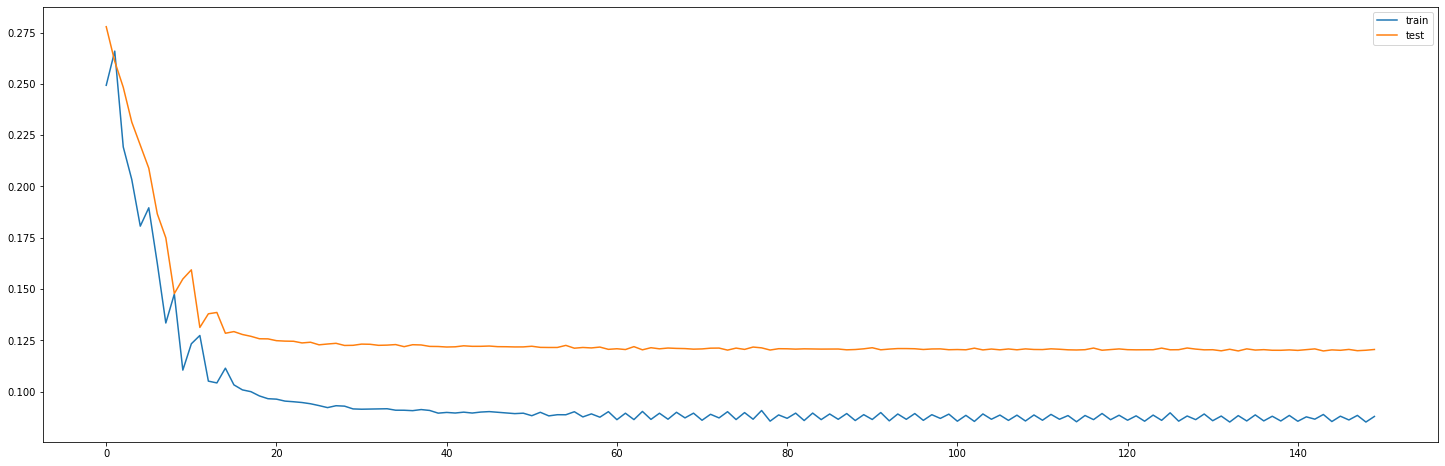

In [381]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [382]:
predicted_copper_price = best_model_Co.predict(testX)

In [383]:
predicted_copper_price = scaler_test.inverse_transform(predicted_copper_price.reshape(-1, 1))

In [384]:
true = scaler_test.inverse_transform(testY.reshape(-1, 1))

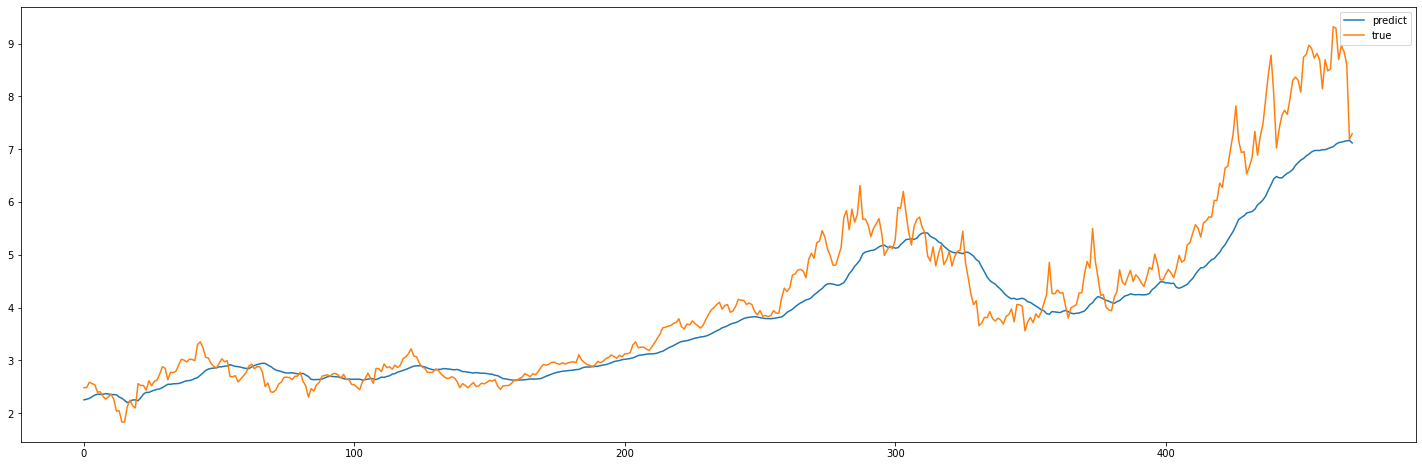

In [385]:
plt.plot(predicted_copper_price, label='predict')
plt.plot(true, label='true')
plt.legend()
plt.show()

In [389]:
# evaluate the model
scores = best_model_Co.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (best_model.metrics_names[1], scores[1]*100))

mse: 0.32%


In [390]:
best_model_Co.save("models/copperPriceModel.h5")
print("Saved model to disk")

Saved model to disk


In [391]:
# load json and create model
# load model
model_Co = load_model("models/copperPriceModel.h5", custom_objects={'root_mean_squared_error':                   
root_mean_squared_error})
print("dd")
# summarize model.
model_Co.summary()
score = model_Co.evaluate(trainX, trainY, verbose=0)
print("%s: %.2f%%" % (model_Co.metrics_names[1], score[1]*100))

dd
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 96)             48768     
                                                                 
 lstm_1 (LSTM)               (None, 1, 480)            1107840   
                                                                 
 lstm_2 (LSTM)               (None, 1, 32)             65664     
                                                                 
 lstm_3 (LSTM)               (None, 1, 320)            451840    
                                                                 
 lstm_4 (LSTM)               (None, 1, 32)             45184     
                                                                 
 dropout (Dropout)           (None, 1, 32)             0         
                                                                 
 dense (Dense)               (None, 1, 1)            

 # Results
 As we can see we build our model from the data we extracted from [Investing.com](https://www.investing.com/) from last 10 years and performed EDA on it and we could see how variuos commodities are related to each other then build LSTM models for each of the commodities
 and here are the **MSE** values for each of them
### **Gold**  > **0.27** 
### **Silver** > **0.40** 
### **Crude  Oil** > **0.34** 
### **Brent Oil** > **0.27**
### **Natural Gas** > **0.35**
### **Copper** > **0.32**